<a href="https://colab.research.google.com/github/IsWallison/Projeto_Churn_Prediction/blob/main/Projeto_Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# Importar os modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import LabelEncoder

In [ ]:
# importar os pacotes necessários
import pandas as pd

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

## Instruções para o modelo de churn prediction

ENTENDA O SEU PROBLEMA
* Olhar o todo e delimitar o escopo do projeto
* Como a solução vai ser usada?
* Quais são as soluções já existentes?
* Qual abordagem usar?
    * Aprendizado Supervisionado
    * Aprendizado Não Supervisionado
    * Aprendizado Por Reforço
* Qual é a métrica de performance?
* Qual a performance mínima esperada para atingir o objetivo?
* Liste as premissas básicas do projeto
* Pesquise sobre *churn rate* no Google
* Veja os serviços que outras empresas de Telecom oferecem 

EXPLORAR OS DADOS
* Estudar cada atributo e suas características:
    * Nome
    * Tipo
        * Categórica
        * Numérica
            * int
            * float
        * Estruturada
        * Não Estruturada
        * etc
    * % de valores ausentes
    * Ruído nos dados e tipo de ruído (outliers, estocásticos, erros de arredondamento)
    * Tipo de distribuição
        * Gaussiana
        * Uniforme
        * Logarítmica
        * etc
* Identificar a variável alvo (target)
* Visualizar os dados
* Estudar a correlação entre os dados
* Ver o balanceamento das classes
* Identificar as transformações que podem ser aplicadas
* Identificar os dados extras que podem ser úteis


PREPARAÇÃO DOS DADOS
* Limpeza dos Dados
    * Consertar ou remover outliers
    * Preencher os valores faltantes ou eliminar as linhas/colunas
        * Zero
        * Média
        * Mediana
        * Frequência
* Seleção de atributos
    * Eliminar os atributos (*features*) que não contêm informações úteis

* *Feature Engineering*
    * Discretizar variáveis contínuas
    * Decompor *features* (categóricas, data, tempo)
    * Aplicar transformações às variáveis
    * Agregar *features* para gerar novas
    
* *Feature Scaling*
    * Normalizar ou padronizar *features*

* Dividir entre treino, teste e validação

CONSTRUIR MODELO(S) DE MACHINE LEARNING
* Analisar as variáveis mais significativas para cada algoritmo
* *Hyperparameters Tuning* (se necessário)
* Uso de *cross-validation*
* Verificar o desempenho do(s) modelo(s) e considerar métodos *Ensemble*

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df_clean = df.copy()
df_clean = df.drop(df[df['TotalCharges']==' '].index,axis=0)
df_clean = df_clean.drop('customerID', axis=1)
df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(float)

In [ ]:
df_clean.head()

In [ ]:
df_clean['Churn'] = (df_clean['Churn']== 'Yes').astype(int)
le = LabelEncoder()

for i in df_clean.columns:
  a = df_clean[f'{i}'].value_counts()

  if len(a) == 2:
    df_clean[f'{i}'] = le.fit_transform(df_clean[f'{i}'])

  elif "Yes" in a:
    df_clean[f'{i}'] = (df_clean[f'{i}']== 'Yes').astype(int)
    
df_clean = pd.get_dummies(df_clean)

In [ ]:
df_clean.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,...,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325


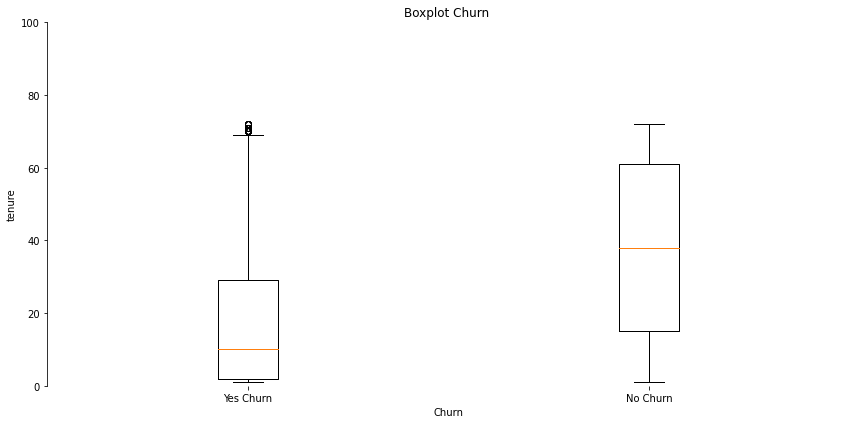

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(df_clean['tenure'][df_clean['Churn'] == 1], positions=[1])

# Plot the second box plot using the second dataset
ax.boxplot(df_clean['tenure'][df_clean['Churn'] == 0], positions=[2])

plt.subplots_adjust(wspace=100, hspace=-50)

ax.set_title("Boxplot Churn ")
ax.set_xlabel("Churn")
ax.set_ylabel("tenure")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])   # remove y-tick labels for the first subplot
plt.xticks([2, 1], ['No Churn', 'Yes Churn'])
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [275]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn'] 

In [297]:
# separar variáveis entre X e y com as colunas escolhidas y vai ser ser o alvo 
def transform(X=X,y=y,oversample=False, scale=False, undersample=False):
  print(len(X))

  if oversample:
    oversampler = RandomOverSampler(random_state=42)
    X, y = oversampler.fit_resample(X, y)

  if scale:
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

  if undersample:
    undersampler = RandomUnderSampler(random_state=42)
    X, y = undersampler.fit_resample(X, y)

  # dividir o dataset entre treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y, shuffle=True)

  print('X Train : ', X_train.shape )
  print('Test : ', X_test.shape)
  print('Y Train : ', y_train.shape)
  print('y Test : ',y_test.shape)
  print('Churn 1:', sum(y==1))
  print('Churn 0: ', sum(y==0))
  return X_train, X_test, y_train, y_test

In [278]:
X_train, X_test, y_train, y_test = transform(undersample=True)


7032
X Train :  (2803, 45)
Test :  (935, 45)
Y Train :  (2803,)
y Test :  (935,)
Churn 1: 1869
Churn 0:  1869


In [ ]:
acc1 = 0
for i in range(1,100):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    knn_accuracy = knn_model.score(X_test, y_test) 
    if knn_accuracy > acc1:
        acc1 = knn_accuracy
        n_nei = i
print('n_neighbors:', n_nei)


n_neighbors: 19


In [279]:
#Criar o modelo k-nearest neighbors e treinar com dados de treino
knn_model = KNeighborsClassifier(n_neighbors =n_nei)
knn_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_knn = knn_model.predict(X_test)

#Avaliação do modelo knn com os dados de teste comparados com os dados reais
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_accuracy = knn_model.score(X_test, y_test)
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)

print("Accuracy: ", knn_accuracy)
print("MAE:", knn_mae)
print("RMSE:", knn_rmse)
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:", knn_confusion_matrix)

Accuracy:  0.706951871657754
MAE: 0.293048128342246
RMSE: 0.5413391989707064
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       467
           1       0.71      0.69      0.70       468

    accuracy                           0.71       935
   macro avg       0.71      0.71      0.71       935
weighted avg       0.71      0.71      0.71       935

Confusion Matrix: [[338 129]
 [145 323]]


In [280]:
# knn over
X_train, X_test, y_train, y_test = transform(oversample=True)
acc1 = 0
for i in range(1,100):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    knn_accuracy = knn_model.score(X_test, y_test) 
    if knn_accuracy > acc1:
        acc1 = knn_accuracy
        n_nei = i
print('n_neighbors:', n_nei)

#Criar o modelo k-nearest neighbors e treinar com dados de treino
knn_model = KNeighborsClassifier(n_neighbors =n_nei)
knn_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_knn = knn_model.predict(X_test)

#Avaliação do modelo knn com os dados de teste comparados com os dados reais
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_accuracy = knn_model.score(X_test, y_test)
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)

print("Accuracy: ", knn_accuracy)
print("MAE:", knn_mae)
print("RMSE:", knn_rmse)
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:", knn_confusion_matrix)

7032
X Train :  (7744, 45)
Test :  (2582, 45)
Y Train :  (7744,)
y Test :  (2582,)
Churn 1: 5163
Churn 0:  5163
n_neighbors: 1
Accuracy:  0.8466305189775368
MAE: 0.1533694810224632
RMSE: 0.391624157863714
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1291
           1       0.80      0.93      0.86      1291

    accuracy                           0.85      2582
   macro avg       0.86      0.85      0.85      2582
weighted avg       0.86      0.85      0.85      2582

Confusion Matrix: [[ 984  307]
 [  89 1202]]


Logistic



In [281]:
# logistic under
X_train, X_test, y_train, y_test = transform(scale=True)
#Criar o modelo de Logistic Regretion e treinar com dados de treino
regre_model = LogisticRegression(random_state=1)
regre_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_regre = regre_model.predict(X_test)

#Avaliação do modelo Logistic Regretion com os dados de teste comparados com os dados reais
regre_mae = mean_absolute_error(y_test, y_pred_regre)
regre_mse = mean_squared_error(y_test, y_pred_regre)
regre_rmse = np.sqrt(regre_mse)
regre_accuracy = accuracy_score(y_test, y_pred_regre)
regre_confusion_matrix = confusion_matrix(y_test, y_pred_regre)
print("MAE:", regre_mae)
print("RMSE:", regre_rmse)
print("Accuracy:", accuracy_score(y_test, y_pred_regre))
print(classification_report(y_test, y_pred_regre))
print("Confusion Matrix:", regre_confusion_matrix)

7032
X Train :  (5274, 45)
Test :  (1758, 45)
Y Train :  (5274,)
y Test :  (1758,)
Churn 1: 1869
Churn 0:  5163
MAE: 0.19738339021615472
RMSE: 0.4442785052375984
Accuracy: 0.8026166097838453
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.57      0.60       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758

Confusion Matrix: [[1147  144]
 [ 203  264]]


In [282]:
# logistic over
X_train, X_test, y_train, y_test = transform(oversample=True)
#Criar o modelo de Logistic Regretion e treinar com dados de treino
regre_model = LogisticRegression(random_state=1)
regre_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_regre = regre_model.predict(X_test)

#Avaliação do modelo Logistic Regretion com os dados de teste comparados com os dados reais
regre_mae = mean_absolute_error(y_test, y_pred_regre)
regre_mse = mean_squared_error(y_test, y_pred_regre)
regre_rmse = np.sqrt(regre_mse)
regre_accuracy = accuracy_score(y_test, y_pred_regre)
regre_confusion_matrix = confusion_matrix(y_test, y_pred_regre)
print("MAE:", regre_mae)
print("RMSE:", regre_rmse)
print("Accuracy:", accuracy_score(y_test, y_pred_regre))
print(classification_report(y_test, y_pred_regre))
print("Confusion Matrix:", regre_confusion_matrix)

7032
X Train :  (7744, 45)
Test :  (2582, 45)
Y Train :  (7744,)
y Test :  (2582,)
Churn 1: 5163
Churn 0:  5163
MAE: 0.2393493415956623
RMSE: 0.4892334224024993
Accuracy: 0.7606506584043378
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1291
           1       0.74      0.80      0.77      1291

    accuracy                           0.76      2582
   macro avg       0.76      0.76      0.76      2582
weighted avg       0.76      0.76      0.76      2582

Confusion Matrix: [[ 936  355]
 [ 263 1028]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [298]:
X_train, X_test, y_train, y_test = transform(undersample=True)
#Criar o modelo de Decision Tree e treinar com dados de treino
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_tree = knn_model.predict(X_test)

#Avaliação do modelo Decision Tree com os dados de teste comparados com os dados reais
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_confusion_matrix = confusion_matrix(y_test, y_pred_tree)

print("MAE:", tree_mae)
print("RMSE:", tree_rmse)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:", tree_confusion_matrix)

7032
X Train :  (2803, 45)
Test :  (935, 45)
Y Train :  (2803,)
y Test :  (935,)
Churn 1: 1869
Churn 0:  1869
MAE: 0.04919786096256684
RMSE: 0.22180590831302677
Accuracy: 0.9508021390374332
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       467
           1       0.94      0.96      0.95       468

    accuracy                           0.95       935
   macro avg       0.95      0.95      0.95       935
weighted avg       0.95      0.95      0.95       935

Confusion Matrix: [[439  28]
 [ 18 450]]


In [285]:
X_train, X_test, y_train, y_test = transform()
#Criar o modelo de Decision Tree e treinar com dados de treino
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_tree = knn_model.predict(X_test)

#Avaliação do modelo Decision Tree com os dados de teste comparados com os dados reais
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_confusion_matrix = confusion_matrix(y_test, y_pred_tree)

print("MAE:", tree_mae)
print("RMSE:", tree_rmse)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:", tree_confusion_matrix)

7032
X Train :  (5274, 45)
Test :  (1758, 45)
Y Train :  (5274,)
y Test :  (1758,)
Churn 1: 1869
Churn 0:  5163
MAE: 0.19169510807736065
RMSE: 0.43782999906054937
Accuracy: 0.8083048919226393
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1291
           1       0.59      0.94      0.72       467

    accuracy                           0.81      1758
   macro avg       0.78      0.85      0.79      1758
weighted avg       0.87      0.81      0.82      1758

Confusion Matrix: [[984 307]
 [ 30 437]]


In [299]:
# separar variáveis entre X e y com as colunas escolhidas y vai ser ser o alvo 
def transform(modelo,X=X,y=y,oversample=False, scale=False, undersample=False):
  


  if oversample:
    oversampler = RandomOverSampler(random_state=42)
    X, y = oversampler.fit_resample(X, y)

  if scale:
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

  if undersample:
    undersampler = RandomUnderSampler(random_state=42)
    X, y = undersampler.fit_resample(X, y)

  # dividir o dataset entre treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y, shuffle=True)

  print('X Train : ', X_train.shape )
  print('Test : ', X_test.shape)
  print('Y Train : ', y_train.shape)
  print('y Test : ',y_test.shape)
  print('Churn 1:', sum(y==1))
  print('Churn 0: ', sum(y==0))

 
  modelo.fit(X_train, y_train)

  # validar com dados de teste
  y_pred = modelo.predict(X_test)

  # Avaliação do modelo com os dados de teste comparados com os dados reais
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  accuracy = modelo.score(X_test, y_test)
  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)

  print("MAE:", tree_mae)
  print("RMSE:", tree_rmse)
  print("Accuracy:", accuracy_score(y_test, y_pred_tree))
  print(classification_report(y_test, y_pred_tree))
  print("Confusion Matrix:", tree_confusion_matrix)

  return

In [300]:
transform(DecisionTreeClassifier(),undersample=True)

X Train :  (2803, 45)
Test :  (935, 45)
Y Train :  (2803,)
y Test :  (935,)
Churn 1: 1869
Churn 0:  1869
MAE: 0.04919786096256684
RMSE: 0.22180590831302677
Accuracy: 0.9508021390374332
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       467
           1       0.94      0.96      0.95       468

    accuracy                           0.95       935
   macro avg       0.95      0.95      0.95       935
weighted avg       0.95      0.95      0.95       935

Confusion Matrix: [[439  28]
 [ 18 450]]
